## Importing Necessary Libraries

In [1]:
import math

#Data Science Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score,jaccard_score,recall_score,accuracy_score,r2_score

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Data Gathering
All the followind Datasets are of factors that might potentially affect house prices in the US and are downloaded from sources like FRED etc.

In [2]:
#Given House Price Index Dataset
HPI=pd.read_csv("https://raw.githubusercontent.com/DivyT-03/HomeLLCSubmission/main/CSUSHPISA.csv")

#Keeping Data only after 2000, as we are only intrested in the data from past 20 years
HPI=HPI[pd.DatetimeIndex(HPI['DATE']).year>=2000].reset_index(drop=True)
HPI.rename(columns={"DATE":"Date","CSUSHPISA": "HPI"}, inplace = True)

#As most of the data avaliable was either yearly or Quaterly we converted all data to quaterly data
HPI["Date"]=pd.to_datetime(HPI["Date"])
HPI["Date"]=HPI.Date.dt.to_period("Q")
HPI=HPI.groupby("Date").mean()

#Displaying the final Dataframe
HPI.head()

,HPI
Date,
2000Q1,101.339333
2000Q2,103.674000
2000Q3,105.785667
2000Q4,108.272667
2001Q1,110.484000


In [3]:
#Source: https://fred.stlouisfed.org/series/GDPC1
GDP=pd.read_csv("https://raw.githubusercontent.com/DivyT-03/HomeLLCSubmission/main/GDPC1.csv")
GDP=GDP[pd.DatetimeIndex(GDP['DATE']).year>=2000].reset_index(drop=True)
GDP=GDP.rename(columns={"DATE":"Date","GDPC1":"GDP"})
GDP["Date"]=pd.to_datetime(GDP["Date"])
GDP["Date"]=GDP["Date"].dt.to_period("Q")
GDP=GDP.groupby("Date").mean()
GDP.head()

,GDP
Date,
2000Q1,12924.179
2000Q2,13160.842
2000Q3,13178.419
2000Q4,13260.506
2001Q1,13222.690


In [4]:
#Source: https://fred.stlouisfed.org/series/PCETRIM12M159SFRBDAL
Inf=pd.read_csv("https://raw.githubusercontent.com/DivyT-03/HomeLLCSubmission/main/PCETRIM12M159SFRBDAL.csv")
Inf=Inf.rename(columns={"DATE":"Date","PCETRIM12M159SFRBDAL":"Inflation"})
Inf['Inflation']=Inf['Inflation'].cumsum()
Inf["Date"]=pd.to_datetime(Inf["Date"])
Inf["Date"]=Inf["Date"].dt.to_period("Q")
Inf=Inf.groupby("Date").mean()
Inf.head()

,Inflation
Date,
2000Q1,4.096667
2000Q2,10.630000
2000Q3,17.480000
2000Q4,24.690000
2001Q1,32.106667


In [5]:
#Source: https://fred.stlouisfed.org/series/GFDEBTN
Debt=pd.read_csv("https://raw.githubusercontent.com/DivyT-03/HomeLLCSubmission/main/GFDEBTN.csv")
Debt=Debt[pd.DatetimeIndex(Debt['DATE']).year>=2000].reset_index(drop=True)
Debt=Debt.rename(columns={"DATE":"Date","GFDEBTN":"Federal_Debt"})
Debt["Date"]=pd.to_datetime(Debt["Date"])
Debt["Date"]=Debt["Date"].dt.to_period("Q")
Debt=Debt.groupby("Date").mean()
Debt.head()

,Federal_Debt
Date,
2000Q1,5773392.0
2000Q2,5685938.0
2000Q3,5674179.0
2000Q4,5662216.0
2001Q1,5773740.0


In [6]:
#Souces: https://fred.stlouisfed.org/series/UNRATE
Unemp=pd.read_csv("https://raw.githubusercontent.com/DivyT-03/HomeLLCSubmission/main/UNRATE.csv")
Unemp=Unemp.rename(columns={"DATE":"Date","UNRATE":"Unemployment"})
Unemp["Date"]=pd.to_datetime(Unemp["Date"])
Unemp["Date"]=Unemp["Date"].dt.to_period("Q")
Unemp=Unemp.groupby("Date").mean()
Unemp.head()

,Unemployment
Date,
2000Q1,4.033333
2000Q2,3.933333
2000Q3,4.000000
2000Q4,3.900000
2001Q1,4.233333


In [7]:
#Source: https://fred.stlouisfed.org/series/W006RC1Q027SBEA
Tax=pd.read_csv("https://raw.githubusercontent.com/DivyT-03/HomeLLCSubmission/main/W006RC1Q027SBEA.csv")
Tax=Tax.rename(columns={"DATE":"Date","W006RC1Q027SBEA":"Tax"})
Tax["Date"]=pd.to_datetime(Tax["Date"])
Tax["Date"]=Tax["Date"].dt.to_period("Q")
Tax=Tax.groupby("Date").mean()
Tax.head()

,Tax
Date,
2000Q1,1272.073
2000Q2,1284.187
2000Q3,1291.650
2000Q4,1306.215
2001Q1,1301.000


In [8]:
#Source: https://fred.stlouisfed.org/series/MKTGNIUSA646NWDB
GPI=pd.read_csv("https://raw.githubusercontent.com/DivyT-03/HomeLLCSubmission/main/MKTGNIUSA646NWDB.csv")
GPI=GPI.rename(columns={"DATE":"Date","MKTGNIUSA646NWDB":"Income"})
GPI["Date"]=pd.to_datetime(GPI["Date"])
for i in [6,3]:
    tmp=GPI.copy()
    tmp["Date"]=GPI.Date + pd.DateOffset(months=i)
    GPI=pd.concat([GPI,tmp])
GPI["Date"]=GPI["Date"].dt.to_period("Q")
GPI=GPI.groupby("Date").mean()
GPI["Income"]=GPI["Income"]/4
GPI.head()

,Income
Date,
2000Q1,2.595965e+12
2000Q2,2.595965e+12
2000Q3,2.595965e+12
2000Q4,2.595965e+12
2001Q1,2.685927e+12


In [9]:
#Source: https://fred.stlouisfed.org/series/POPTHM
Population=pd.read_csv("https://raw.githubusercontent.com/DivyT-03/HomeLLCSubmission/main/POPTHM.csv")
Population=Population.rename(columns={"DATE":"Date","POPTHM":"Population"})
Population["Date"]=pd.to_datetime(Population["Date"])
Population["Date"]=Population["Date"].dt.to_period("Q")
Population=Population.groupby("Date").mean()
Population.head()

,Population
Date,
2000Q1,281304.333333
2000Q2,282002.000000
2000Q3,282768.666667
2000Q4,283518.666667
2001Q1,284168.666667


In [10]:
#Source: https://fred.stlouisfed.org/series/RHEACBW027SBOG
Loans=pd.read_csv("https://raw.githubusercontent.com/DivyT-03/HomeLLCSubmission/main/RHEACBW027SBOG.csv")
Loans=Loans.rename(columns={"DATE":"Date","RHEACBW027SBOG":"House Loans"})
Loans["Date"]=pd.to_datetime(Loans["Date"])
Loans["Date"]=Loans["Date"].dt.to_period("Q")
Loans=Loans.groupby("Date").mean()
Loans.head()

,House Loans
Date,
2000Q1,106.641623
2000Q2,112.998038
2000Q3,120.024838
2000Q4,125.684062
2001Q1,130.251223


In [11]:
#Source: https://fred.stlouisfed.org/series/BKFTTLA641N
Fails=pd.read_csv("https://raw.githubusercontent.com/DivyT-03/HomeLLCSubmission/main/BKFTTLA641N.csv")
Fails=Fails.rename(columns={"DATE":"Date","BKFTTLA641N":"Institution Fails"})
Fails["Date"]=pd.to_datetime(Fails["Date"])
for i in [6,3]:
    tmp=Fails.copy()
    tmp["Date"]=Fails.Date + pd.DateOffset(months=i)
    Fails=pd.concat([Fails,tmp])
Fails["Date"]=Fails["Date"].dt.to_period("Q")
Fails=Fails.groupby("Date").mean()
Fails["Institution Fails"]=Fails["Institution Fails"]/4
Fails.head()

,Institution Fails
Date,
2000Q1,1.75
2000Q2,1.75
2000Q3,1.75
2000Q4,1.75
2001Q1,1.00


In [12]:
#Source: https://fred.stlouisfed.org/series/MMMFTAQ027S
Market=pd.read_csv("https://raw.githubusercontent.com/DivyT-03/HomeLLCSubmission/main/MMMFTAQ027S.csv")
Market=Market.rename(columns={"DATE":"Date","MMMFTAQ027S":"Market Flow"})
Market["Date"]=pd.to_datetime(Market["Date"])
Market["Date"]=Market["Date"].dt.to_period("Q")
Market=Market.groupby("Date").mean()
Market.head()

,Market Flow
Date,
2000Q1,273021.0
2000Q2,95791.0
2000Q3,265705.0
2000Q4,293891.0
2001Q1,746537.0


In [13]:
#Source: https://fred.stlouisfed.org/series/INTDSRUSM193N
Intrest=pd.read_csv("https://raw.githubusercontent.com/DivyT-03/HomeLLCSubmission/main/INTDSRUSM193N.csv")
Intrest=Intrest.rename(columns={"DATE":"Date","INTDSRUSM193N":"Intrest Rates"})
Intrest["Date"]=pd.to_datetime(Intrest["Date"])
Intrest["Date"]=Intrest["Date"].dt.to_period("Q")
Intrest=Intrest.groupby("Date").mean()
Intrest.head()

,Intrest Rates
Date,
2000Q1,5.193333
2000Q2,5.736667
2000Q3,6.000000
2000Q4,6.000000
2001Q1,5.110000


In [14]:
#Source: https://fred.stlouisfed.org/series/MMMFFAQ027S
Level=pd.read_csv("https://raw.githubusercontent.com/DivyT-03/HomeLLCSubmission/main/INTDSRUSM193N.csv")
Level=Level.rename(columns={"DATE":"Date","INTDSRUSM193N":"Market Level"})
Level["Date"]=pd.to_datetime(Level["Date"])
Level["Date"]=Level["Date"].dt.to_period("Q")
Level=Level.groupby("Date").mean()
Level.head()

,Market Level
Date,
2000Q1,5.193333
2000Q2,5.736667
2000Q3,6.000000
2000Q4,6.000000
2001Q1,5.110000


In [15]:
#Source: https://fred.stlouisfed.org/series/MORTGAGE30US
Mortgage=pd.read_csv("https://raw.githubusercontent.com/DivyT-03/HomeLLCSubmission/main/MORTGAGE30US.csv")
Mortgage=Mortgage.rename(columns={"DATE":"Date","MORTGAGE30US":"Mortgage Rate"})
Mortgage["Date"]=pd.to_datetime(Mortgage["Date"])
Mortgage["Date"]=Mortgage["Date"].dt.to_period("Q")
Mortgage=Mortgage.groupby("Date").mean()
Mortgage.head()

,Mortgage Rate
Date,
2000Q1,8.256923
2000Q2,8.316154
2000Q3,8.020000
2000Q4,7.620769
2001Q1,7.006923


## Database Creation

In [16]:
df_list=[GDP,GPI,Inf,Market,Level,Mortgage,Tax,Intrest,Loans,Debt,Fails,Population,Unemp,HPI]
df=pd.concat(df_list, axis=1).reindex(HPI.index)
df.head()

,GDP,Income,Inflation,Market Flow,Market Level,Mortgage Rate,Tax,Intrest Rates,House Loans,Federal_Debt,Institution Fails,Population,Unemployment,HPI
Date,,,,,,,,,,,,,,
2000Q1,12924.179,2.595965e+12,4.096667,273021.0,5.193333,8.256923,1272.073,5.193333,106.641623,5773392.0,1.75,281304.333333,4.033333,101.339333
2000Q2,13160.842,2.595965e+12,10.630000,95791.0,5.736667,8.316154,1284.187,5.736667,112.998038,5685938.0,1.75,282002.000000,3.933333,103.674000
2000Q3,13178.419,2.595965e+12,17.480000,265705.0,6.000000,8.020000,1291.650,6.000000,120.024838,5674179.0,1.75,282768.666667,4.000000,105.785667
2000Q4,13260.506,2.595965e+12,24.690000,293891.0,6.000000,7.620769,1306.215,6.000000,125.684062,5662216.0,1.75,283518.666667,3.900000,108.272667
2001Q1,13222.690,2.685927e+12,32.106667,746537.0,5.110000,7.006923,1301.000,5.110000,130.251223,5773740.0,1.00,284168.666667,4.233333,110.484000


## Data Preprocessing

### Data Cleaning

In [17]:
df.tail()

,GDP,Income,Inflation,Market Flow,Market Level,Mortgage Rate,Tax,Intrest Rates,House Loans,Federal_Debt,Institution Fails,Population,Unemployment,HPI
Date,,,,,,,,,,,,,,
2019Q4,19253.959,5.422503e+12,470.570000,510432.0,2.250000,3.700000,2177.120,2.250000,325.311969,23201380.0,1.0,329186.333333,3.600000,212.534333
2020Q1,19010.848,NaN,476.696667,3093728.0,1.583333,3.521538,2149.983,1.583333,318.236869,23223813.0,1.0,329529.333333,3.800000,215.628667
2020Q2,17302.511,NaN,482.493333,1300857.0,0.250000,3.239231,1929.685,0.250000,311.028977,26477241.0,1.0,329897.333333,13.066667,217.939333
2020Q3,18596.521,NaN,488.190000,-1054343.0,0.250000,2.952308,2064.021,0.250000,299.715000,26945391.0,1.0,330367.333333,8.800000,222.563333
2020Q4,18783.902,NaN,493.700000,-533570.0,0.250000,2.760714,NaN,0.250000,288.463523,NaN,1.0,330834.666667,6.766667,232.546333


In [18]:
#Checking for null values
df.isna().sum()

GDP                  0
Income               4
Inflation            0
Market Flow          0
Market Level         0
Mortgage Rate        0
Tax                  1
Intrest Rates        0
House Loans          0
Federal_Debt         1
Institution Fails    0
Population           0
Unemployment         0
HPI                  0
dtype: int64

We observe there are null values, so to fill the Tax and Debt Null values we took the mean of the vales of other Quaters, While for income we took the Income growth from 2018 to 2019 and calculated the growth from 2019 to 2020 assuming the same 

In [19]:
df.Federal_Debt=df.Federal_Debt.fillna(df[df.index.year==2020].Federal_Debt.mean())
df.Tax=df.Tax.fillna(df[df.index.year==2020].Tax.mean())
df.Income=df.Income.fillna(int(df[df.index=="2019Q1"]["Income"])+(int(df[df.index=="2019Q1"]["Income"])-int(df[df.index=="2018Q1"]["Income"])))

In [20]:
#Checking for null values
df.isna().sum()

GDP                  0
Income               0
Inflation            0
Market Flow          0
Market Level         0
Mortgage Rate        0
Tax                  0
Intrest Rates        0
House Loans          0
Federal_Debt         0
Institution Fails    0
Population           0
Unemployment         0
HPI                  0
dtype: int64

## Data Normalization

In [21]:
cols=list(df.columns)
cols.remove('HPI')
cols

['GDP',
 'Income',
 'Inflation',
 'Market Flow',
 'Market Level',
 'Mortgage Rate',
 'Tax',
 'Intrest Rates',
 'House Loans',
 'Federal_Debt',
 'Institution Fails',
 'Population',
 'Unemployment']

In [22]:
scaler=MinMaxScaler()
scaler.fit(df[cols])
df[cols]=scaler.transform(df[cols])
df.head()

,GDP,Income,Inflation,Market Flow,Market Level,Mortgage Rate,Tax,Intrest Rates,House Loans,Federal_Debt,Institution Fails,Population,Unemployment,HPI
Date,,,,,,,,,,,,,,
2000Q1,0.000000,0.000000,0.000000,0.319995,0.823889,0.989338,0.234576,0.823889,0.000000,0.005224,0.044586,0.000000,0.045775,101.339333
2000Q2,0.037389,0.000000,0.013344,0.277270,0.914444,1.000000,0.244821,0.914444,0.012690,0.001115,0.044586,0.014086,0.035211,103.674000
2000Q3,0.040166,0.000000,0.027335,0.318232,0.958333,0.946691,0.251132,0.958333,0.026718,0.000562,0.044586,0.029564,0.042254,105.785667
2000Q4,0.053134,0.000000,0.042061,0.325027,0.958333,0.874828,0.263450,0.958333,0.038016,0.000000,0.044586,0.044707,0.031690,108.272667
2001Q1,0.047160,0.029596,0.057210,0.434149,0.810000,0.764334,0.259040,0.810000,0.047133,0.005240,0.025478,0.057830,0.066901,110.484000


## Data Visualization

### Corelation

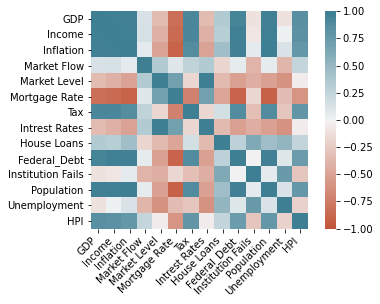

In [23]:
import seaborn as sns

ax = sns.heatmap(
    df.corr(),                                  #Passing arguement whose heatmap is to be made
    vmin=-1, vmax=1, center=0,                  #Defining dimensions of heatmap
    cmap=sns.diverging_palette(20, 220, n=200), #Defining Colorpalatte for heatmap
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [24]:
df.corr()

,GDP,Income,Inflation,Market Flow,Market Level,Mortgage Rate,Tax,Intrest Rates,House Loans,Federal_Debt,Institution Fails,Population,Unemployment,HPI
GDP,1.000000,0.984056,0.972182,0.140046,-0.346740,-0.826048,0.926450,-0.346740,0.344630,0.948631,-0.094670,0.972357,-0.093925,0.858992
Income,0.984056,1.000000,0.984133,0.143644,-0.411538,-0.856852,0.917691,-0.411538,0.315658,0.981827,-0.072319,0.982251,0.009857,0.833876
Inflation,0.972182,0.984133,1.000000,0.067809,-0.507256,-0.901213,0.869411,-0.507256,0.446938,0.976092,0.069885,0.998885,0.126574,0.786724
Market Flow,0.140046,0.143644,0.067809,1.000000,0.338274,0.098120,0.264460,0.338274,-0.173275,0.056981,-0.390763,0.057309,-0.388243,0.246992
Market Level,-0.346740,-0.411538,-0.507256,0.338274,1.000000,0.709648,-0.165658,1.000000,-0.351705,-0.515375,-0.431539,-0.511912,-0.605375,-0.035737
Mortgage Rate,-0.826048,-0.856852,-0.901213,0.098120,0.709648,1.000000,-0.695798,0.709648,-0.483397,-0.891820,-0.167698,-0.906554,-0.328318,-0.589756
Tax,0.926450,0.917691,0.869411,0.264460,-0.165658,-0.695798,1.000000,-0.165658,0.163973,0.880481,-0.327039,0.875959,-0.278156,0.789110
Intrest Rates,-0.346740,-0.411538,-0.507256,0.338274,1.000000,0.709648,-0.165658,1.000000,-0.351705,-0.515375,-0.431539,-0.511912,-0.605375,-0.035737
House Loans,0.344630,0.315658,0.446938,-0.173275,-0.351705,-0.483397,0.163973,-0.351705,1.000000,0.283701,0.618542,0.447702,0.528758,0.255055
Federal_Debt,0.948631,0.981827,0.976092,0.056981,-0.515375,-0.891820,0.880481,-0.515375,0.283701,1.000000,-0.004038,0.976541,0.108352,0.738754


Money Market Level and Intrest Rates are not good predictors for HPI so we drop them. 
Later on while model training we droped even more columns (with corlation <0.5 to improve model training accuracy)

In [25]:
df.drop(["Market Level","Intrest Rates","Market Flow","House Loans","Unemployment","Institution Fails"],axis=1,inplace=True)

### Scatter Plots

We plot the remaining columns vs HPI to observe the trend and decide a model

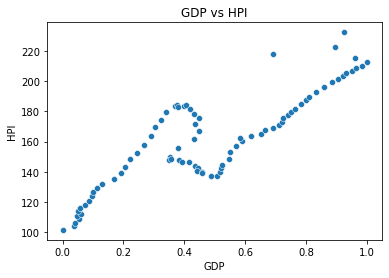

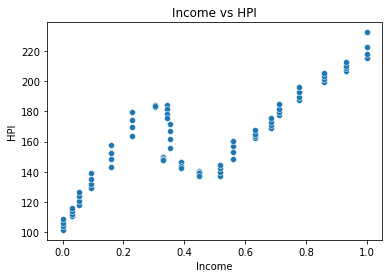

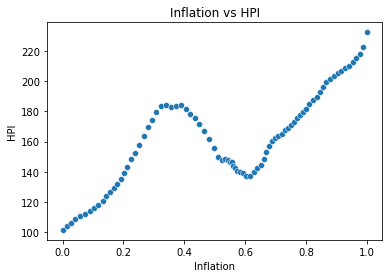

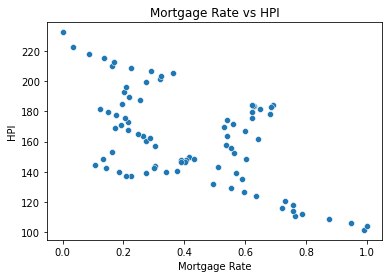

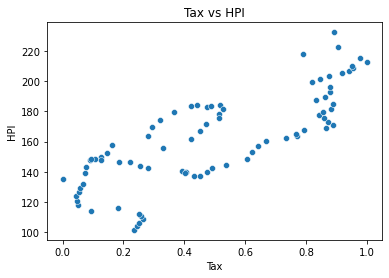

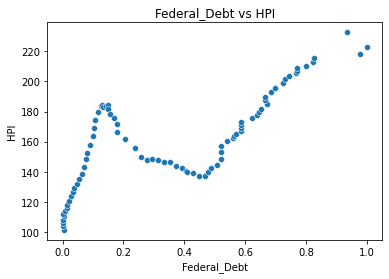

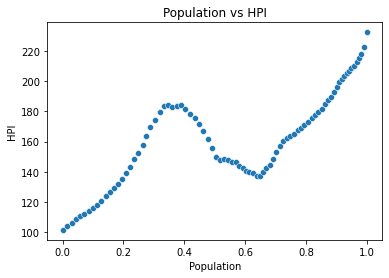

In [26]:
def Scatter_plot(df,X,y):
    #Creating a figure and a subplot to plot the values
    fig, ax = plt.subplots()
    
    #plotting the values on the graph
    sns.scatterplot(data=df,x=X,y=y,ax=ax)
    title=X+" vs "+y
    
    # Add title and labels
    ax.set_title(title)
    ax.set_xlabel(X)
    ax.set_ylabel(y)
    plt.show()
    
cols=list(df.columns)
cols.remove("HPI")
for i in cols:
    Scatter_plot(df,i,"HPI")

## Model Development

#### Model Selection
1. As most of the Data was avaliable for only Quaterly period we only have 80 Rows and hence Deep learning algos, RNN, LSTM models were not possible, and hence were producing -ve r2 score
2. Polynomial Regression was applied, without any time dependency while considering even columns with small corelation, and with columns with >0.5 Corelation but that also yeilded in largely -ve r2 score (some even goint to -1120 and -2402)
3. Other Methods such as Linear Regression, Ridge Regression, Lasso Regression, Nearest Neighbours and Bayesian Regression were also applied with different parameters but all resulted in only -ve r2 score
4. Then time dependency was added in the dataset and was trained on Ploynomial Regression in which degree 3 ploynomial yeilded a positive r2 score but only 0.21
5. Then on this dataset all other above mentioned techniques were tried out of which Ridge Regression yeilded the best result and hence was choosen. BayesianRidge and Linear Models produced the next best results (0.80)

In [27]:
count=4
dummy=[]
for i in range(count-1,len(df)):
  lst=[]
  for j in range(count):
    lst=lst+list(df.iloc[i-(3-j)])
  dummy.append(lst)
cols=[]
for i in range(-3,0,1):
  for j in list(df.columns):
    cols.append(j+"("+str(i)+")")
cols=cols+list(df.columns)
df=pd.DataFrame(dummy,columns=cols)
df.head()

,GDP(-3),Income(-3),Inflation(-3),Mortgage Rate(-3),Tax(-3),Federal_Debt(-3),Population(-3),HPI(-3),GDP(-2),Income(-2),...,Population(-1),HPI(-1),GDP,Income,Inflation,Mortgage Rate,Tax,Federal_Debt,Population,HPI
0,0.000000,0.000000,0.000000,0.989338,0.234576,0.005224,0.000000,101.339333,0.037389,0.000000,...,0.029564,105.785667,0.053134,0.000000,0.042061,0.874828,0.263450,0.000000,0.044707,108.272667
1,0.037389,0.000000,0.013344,1.000000,0.244821,0.001115,0.014086,103.674000,0.040166,0.000000,...,0.044707,108.272667,0.047160,0.029596,0.057210,0.764334,0.259040,0.005240,0.057830,110.484000
2,0.040166,0.000000,0.027335,0.946691,0.251132,0.000562,0.029564,105.785667,0.053134,0.000000,...,0.057830,110.484000,0.059371,0.029596,0.072719,0.786488,0.250754,0.003035,0.071330,112.202333
3,0.053134,0.000000,0.042061,0.874828,0.263450,0.000000,0.044707,108.272667,0.047160,0.029596,...,0.071330,112.202333,0.050650,0.029596,0.088677,0.756580,0.092671,0.006825,0.086392,114.156333
4,0.047160,0.029596,0.057210,0.764334,0.259040,0.005240,0.057830,110.484000,0.059371,0.029596,...,0.086392,114.156333,0.056350,0.029596,0.103955,0.721825,0.182760,0.013213,0.101090,115.871333


In [28]:
def RR(independents,dependent,sp,df1,op):
    df=df1
    for column in df[independents]:
        df[str(column)]=(df[str(column)]-np.mean(df[str(column)]))/np.std(df[str(column)])
    from sklearn.linear_model import Ridge
    X_train,X_test,y_train,y_test=train_test_split(df[independents],df[dependent],test_size=(1-(sp/100)),shuffle=False)
    rr=Ridge(alpha=float(op))
    rr.fit(X_train,y_train)
    yhat=rr.predict(X_test)
    RSS=np.mean((y_test-yhat)**2)
    VS=rr.score(X_test,y_test)
    MAE=np.mean(np.absolute(y_test-yhat))
    R2=r2_score(y_test,yhat)
    MSE=np.sqrt(metrics.mean_squared_error(y_test,yhat))
    return rr,round(RSS,2),round(VS,2),round(MAE,2),round(R2,2),round(MSE,2)


In [29]:
cols=df.columns.drop("HPI")
cols

Index(['GDP(-3)', 'Income(-3)', 'Inflation(-3)', 'Mortgage Rate(-3)',
       'Tax(-3)', 'Federal_Debt(-3)', 'Population(-3)', 'HPI(-3)', 'GDP(-2)',
       'Income(-2)', 'Inflation(-2)', 'Mortgage Rate(-2)', 'Tax(-2)',
       'Federal_Debt(-2)', 'Population(-2)', 'HPI(-2)', 'GDP(-1)',
       'Income(-1)', 'Inflation(-1)', 'Mortgage Rate(-1)', 'Tax(-1)',
       'Federal_Debt(-1)', 'Population(-1)', 'HPI(-1)', 'GDP', 'Income',
       'Inflation', 'Mortgage Rate', 'Tax', 'Federal_Debt', 'Population'],
      dtype='object')

In [30]:
dependent='HPI'
sp=90
model,RSS,VS,MAE,R2,MSE=RR(cols,dependent,sp,df,0.4)
output={"Model":str(model),'RSS':RSS,"R2":R2,"VS":VS,"MAE":MAE,"MSE":MSE}
output

{'Model': 'Ridge(alpha=0.4)',
 'RSS': 1.64,
 'R2': 0.98,
 'VS': 0.98,
 'MAE': 0.88,
 'MSE': 1.28}

In [31]:
print("Model used:",output["Model"])
print("R2 Score:",output["R2"])
print("Residual Sum Of Squares:",output["RSS"])
print("Variance Score:",output["VS"])
print("Mean Absolute Error:",output["MAE"])
print("Mean Squared Error:",output["MSE"])

Model used: Ridge(alpha=0.4)
R2 Score: 0.98
Residual Sum Of Squares: 1.64
Variance Score: 0.98
Mean Absolute Error: 0.88
Mean Squared Error: 1.28


Thus, we have trained our Ridge model with 0.98 R2 Score. 